In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
from sklearn import linear_model

%matplotlib inline

In [2]:
df = pd.read_csv("../data/medical-data.csv",sep=";").astype(float)
df.columns = ['idade','peso','carga_final','vo2_max']
df.describe()

,idade,peso,carga_final,vo2_max
count,1172.000000,1172.000000,1172.000000,1172.000000
mean,53.290956,85.925776,172.271502,140.631503
std,14.746297,14.799113,70.093124,1973.597226
min,18.000000,45.300000,30.000000,5.846847
25%,42.000000,76.100000,120.000000,21.799827
50%,54.000000,83.700000,170.000000,28.387223
75%,64.000000,94.450000,220.000000,36.050892
max,91.000000,178.900000,432.000000,45375.000000


> Out of all records, 3 are in the tens of thousands while all others are no larger than 80. I'll therefore remove those as they are likely noise.

In [3]:
df = df[df['vo2_max'] < 10000]

> A few plots just to get a feeling for our dataset

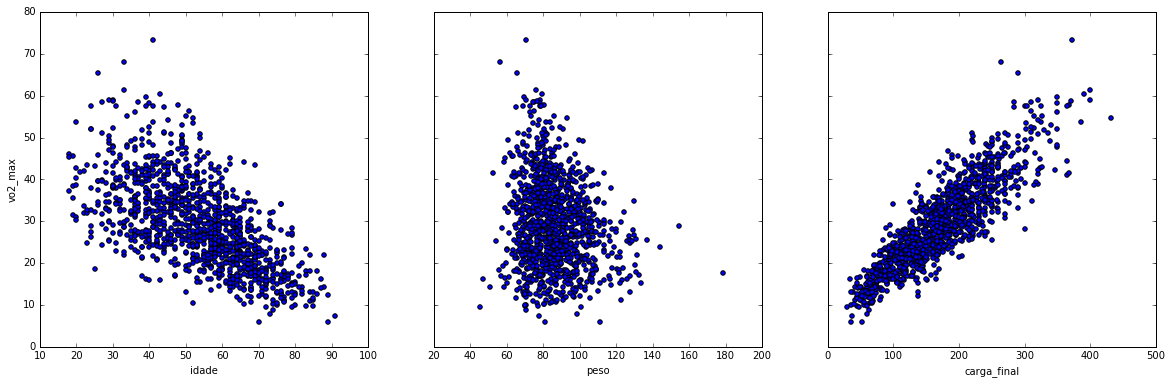

In [4]:
fig, axs = plt.subplots(1,3, sharey=True)
df.plot(kind='scatter',x='idade',y='vo2_max',ax=axs[0],figsize=(20,6))
df.plot(kind='scatter',x='peso',y='vo2_max',ax=axs[1])
df.plot(kind='scatter',x='carga_final',y='vo2_max',ax=axs[2])

# QUESTION 1

## ITEM 1.1

> Curves fitted using least-squares using different degrees, trying to predict y (`vo2_max`) in terms of x (`carga_final`).

> The parameters for the curves are the number of degrees in the polynomial and sigma, the standard deviation of the error, which is assumed gaussian

/home/felipe/statistical-learning/venv/lib/python3.4/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


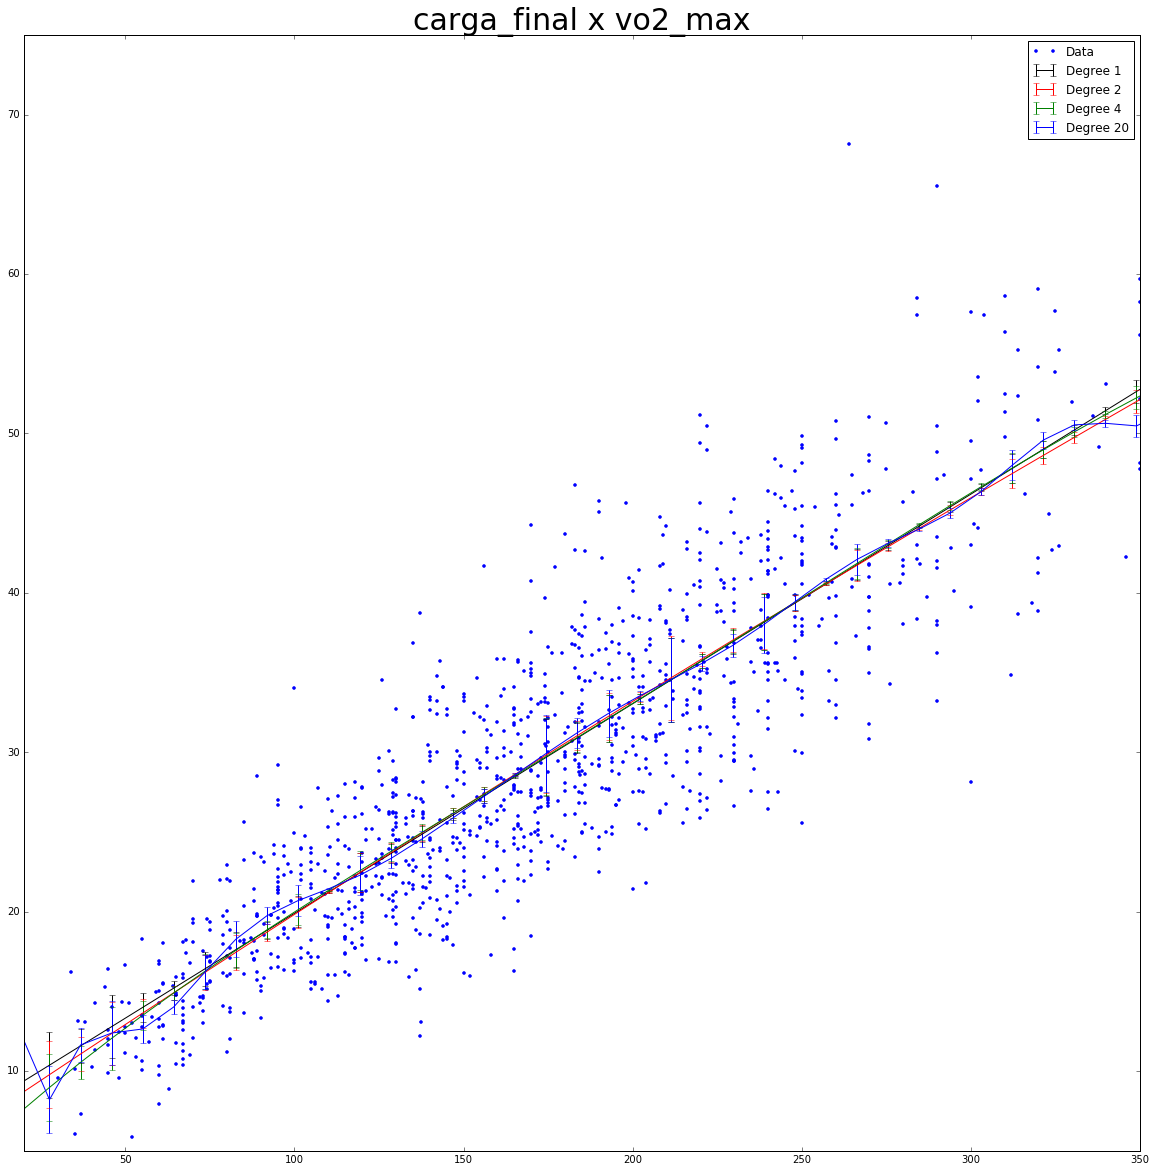

In [5]:
x = df['carga_final'].values
y = df['vo2_max'].values

plt.clf()

MU = 0
SIGMA = 1

# degree 1
params_1 = np.polyfit(x,y,deg=1)

# degree 2
params_2 = np.polyfit(x,y,deg=2)

# degree 4
params_4 = np.polyfit(x,y,deg=4)

# degree 20
params_20 = np.polyfit(x,y,deg=20)

p1 = np.poly1d(params_1) 
p2 = np.poly1d(params_2)
p4 = np.poly1d(params_4)
p20 = np.poly1d(params_20)
plt.figure(figsize=(20,20))

# only 50 points for easier visualization
xs = np.linspace(0,450,50)

plt.title("carga_final x vo2_max",{'fontsize':30})
plt.plot(x,y,'.',label="Data")

# error itself is a gaussian RV
error = np.random.normal(MU,SIGMA,len(xs))

plt.errorbar(xs,p1(xs),yerr=error,fmt='k-', label='Degree 1')
plt.errorbar(xs,p2(xs),yerr=error,fmt='r-', label='Degree 2')
plt.errorbar(xs,p4(xs),yerr=error,fmt='g-', label='Degree 4')
plt.errorbar(xs,p20(xs),yerr=error,fmt='b-', label='Degree 20')

plt.ylim(5,75)
plt.xlim(20,350)
_ = plt.legend()

**Calculating the Negative Log Likelihood**

The negative log likelihood (NLL) of the parameters are as follows:

$$NLL(\theta) = \sum_{i=1}^{N} \log{\Pr(y_i\vert x_i,\theta)} $$


In [6]:
xs = np.linspace(0,450,len(x))

# negative log likelihood for the model using SIGMA and a 1-degree polynomial
nll_1 = - np.sum(stats.norm.logpdf(x,loc=p1(xs),scale=SIGMA))
print("For degree 1(w = {0}), NLL equals {1} \n\n".format(params_1,nll_1))

nll_2 = - np.sum(stats.norm.logpdf(x,loc=p2(xs),scale=SIGMA))
print("For degree 2 (w = {0}), NLL equals {1} \n\n".format(params_2,nll_2))

nll_4 = - np.sum(stats.norm.logpdf(x,loc=p4(xs),scale=SIGMA))
print("For degree 4 (w = {0}), NLL equals {1} \n\n".format(params_4,nll_4))

nll_20 = - np.sum(stats.norm.logpdf(x,loc=p20(xs),scale=SIGMA))
print("For degree 20 (w = {0}), NLL equals {1} \n\n".format(params_20,nll_20))


For degree 1(w = [ 0.13146104  6.75017039]), NLL equals 14335088.76654886 


For degree 2 (w = [ -2.95580058e-05   1.42482419e-01   5.87413510e+00]), NLL equals 14384721.6642695 


For degree 4 (w = [ -2.38452092e-09   1.96555824e-06  -5.77354372e-04   2.02222141e-01
   3.80245321e+00]), NLL equals 14436566.851165801 


For degree 20 (w = [ -1.62315958e-43   4.24159529e-40  -4.39469037e-37   2.01606725e-34
  -8.21006967e-33  -3.02690140e-29   7.98406378e-27   3.44868522e-24
  -2.18638827e-21   3.57041010e-20   3.61167486e-16  -1.75821999e-13
   4.68276552e-11  -8.25458237e-09   1.01541916e-06  -8.81281672e-05
   5.32963959e-03  -2.17171690e-01   5.60268408e+00  -8.11824181e+01
   5.03293951e+02]), NLL equals 808025425.904914 




## ITEM 1.2

> Curves fitted using least-squares using different degrees, trying to predict y (`vo2_max`) in terms of x (`idade`)

/home/felipe/statistical-learning/venv/lib/python3.4/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


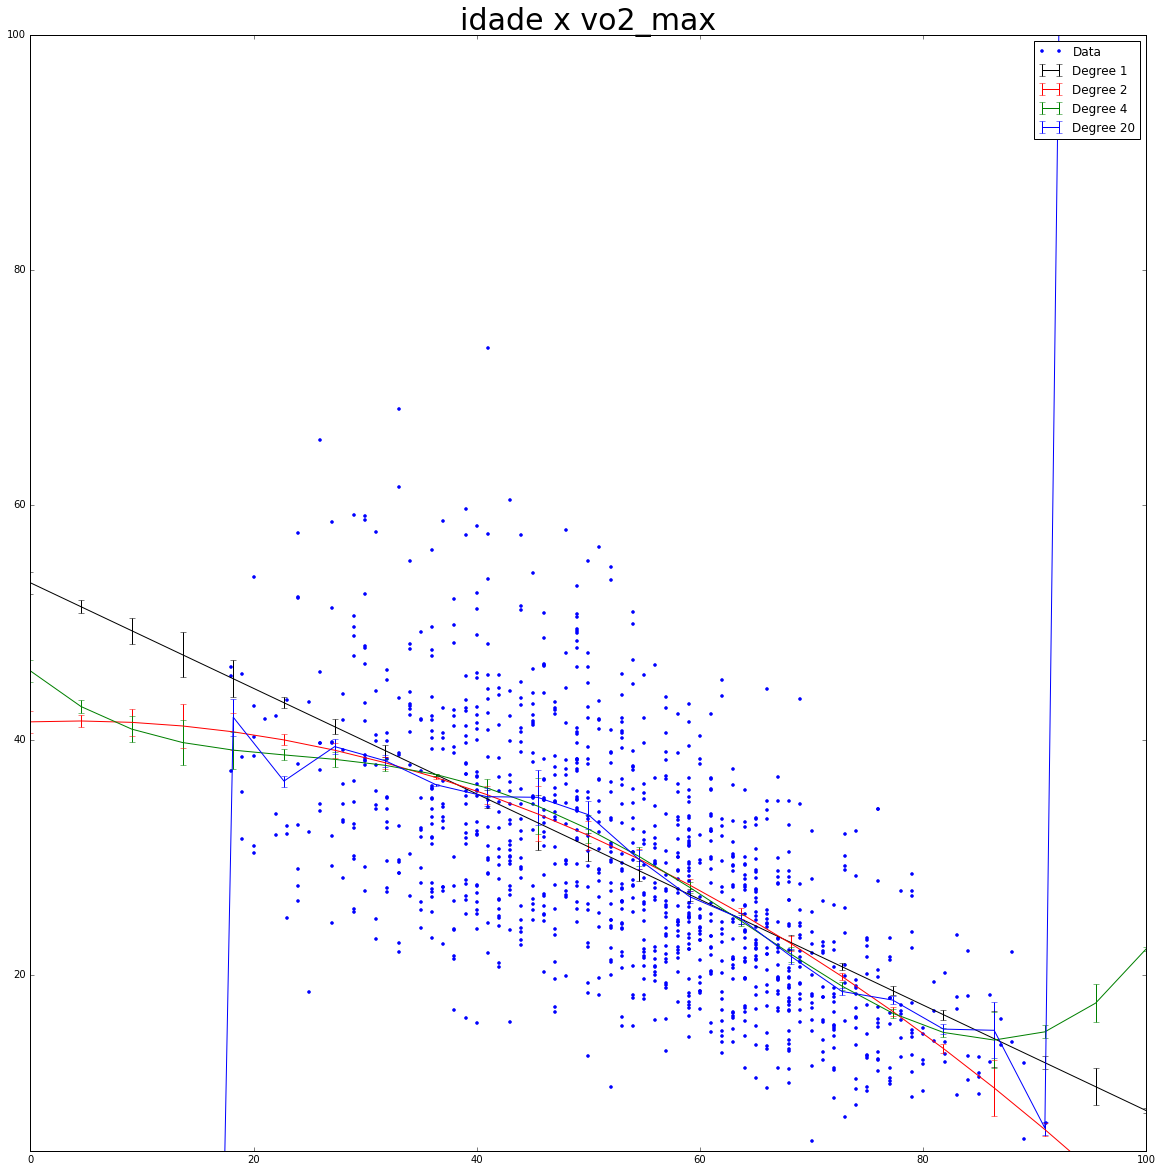

In [7]:
x = df['idade'].values
y = df['vo2_max'].values

plt.clf()

params_1 = np.polyfit(x,y,deg=1)
params_2 = np.polyfit(x,y,deg=2)
params_4 = np.polyfit(x,y,deg=4)
params_20 = np.polyfit(x,y,deg=20)

p1 = np.poly1d(params_1) 
p2 = np.poly1d(params_2)
p4 = np.poly1d(params_4)
p20 = np.poly1d(params_20)
plt.figure(figsize=(20,20))

plt.figure(figsize=(20,20))

xs = np.linspace(0,450,100)

plt.title("idade x vo2_max",{'fontsize':30})
plt.plot(x,y,'.',label="Data")
error = np.random.normal(MU,SIGMA,len(xs))

plt.errorbar(xs,p1(xs),yerr=error,fmt='k-', label='Degree 1')
plt.errorbar(xs,p2(xs),yerr=error,fmt='r-', label='Degree 2')
plt.errorbar(xs,p4(xs),yerr=error,fmt='g-', label='Degree 4')
plt.errorbar(xs,p20(xs),yerr=error,fmt='b-', label='Degree 20')
plt.ylim(5,100)
plt.xlim(0,100)
_ = plt.legend()

**Calculating the Negative Log Likelihood**

In [8]:
xs = np.linspace(0,450,len(x))

# negative log likelihood for the model using SIGMA and a 1-degree polynomial
nll_1 = - np.sum(stats.norm.logpdf(x,loc=p1(xs),scale=SIGMA))
print("For degree 1(w = {0}), NLL equals {1} \n\n".format(params_1,nll_1))

nll_2 = - np.sum(stats.norm.logpdf(x,loc=p2(xs),scale=SIGMA))
print("For degree 2 (w = {0}), NLL equals {1} \n\n".format(params_2,nll_2))

nll_4 = - np.sum(stats.norm.logpdf(x,loc=p4(xs),scale=SIGMA))
print("For degree 4 (w = {0}), NLL equals {1} \n\n".format(params_4,nll_4))

nll_20 = - np.sum(stats.norm.logpdf(x,loc=p20(xs),scale=SIGMA))
print("For degree 20 (w = {0}), NLL equals {1} \n\n".format(params_20,nll_20))

For degree 1(w = [ -0.44938877  53.35517048]), NLL equals 8440200.644745156 


For degree 2 (w = [ -4.60644247e-03   3.70051663e-02   4.15160021e+01]), NLL equals 103084443.73214321 


For degree 4 (w = [  3.95891328e-06  -6.96941749e-04   3.59146540e-02  -8.17511424e-01
   4.58544566e+01]), NLL equals 649654422982.5114 


For degree 20 (w = [ -2.05692498e-30   1.28608179e-27  -3.22311408e-25   3.74307545e-23
  -1.04810369e-21  -2.00565872e-19   1.50967406e-17   9.95769941e-16
  -1.38935629e-13  -2.95353760e-12   1.13347090e-09  -3.51555338e-08
  -5.84841025e-06   7.56953245e-04  -4.58393269e-02   1.75098020e+00
  -4.50679158e+01   7.84374969e+02  -8.87843195e+03   5.90675978e+04
  -1.75207495e+05]), NLL equals 3.063912016300633e+46 




# QUESTION 2

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Axes(0.125,0.125;0.775x0.775)


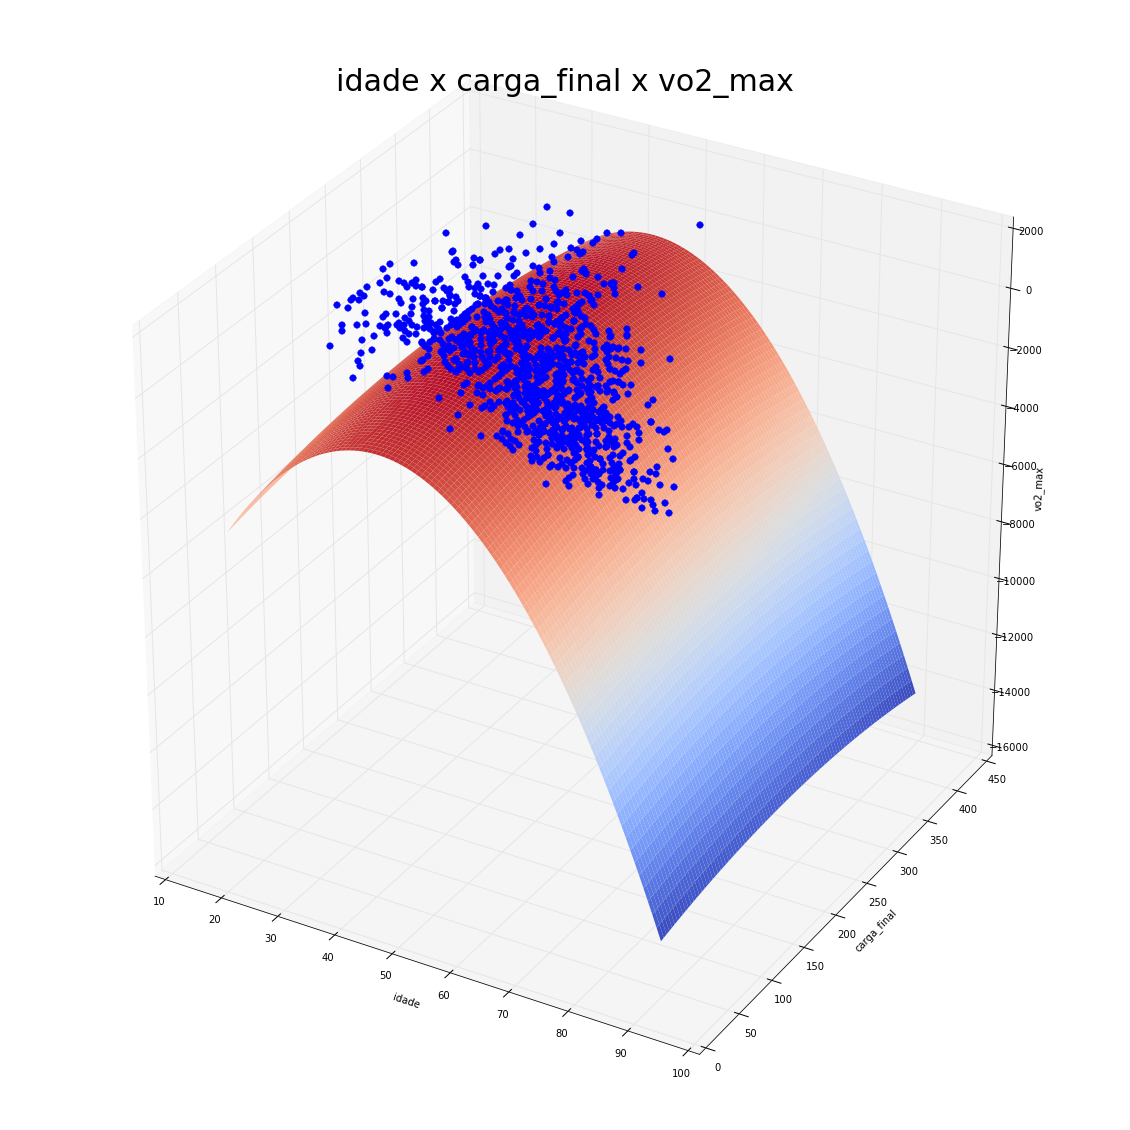

In [10]:
x1 = df["idade"]
x2 = df["carga_final"]
z  = df["vo2_max"]

plt.clf()

domain_x1 = np.linspace(x1.min(),x1.max(),100)
domain_x2 = np.linspace(x2.min(),x2.max(),100)

# the center of our 2-d domain
mean_x1 = x1.mean()
mean_x2 = x2.mean()

# this is a multivariate gaussian dist with the given parameters
# dist = stats.multivariate_normal(mean = MEAN,cov=COV)

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
plt.title("idade x carga_final x vo2_max",{'fontsize':30})
plt.plot(x1,x2,z,'.',ms=13.0, label="Data")

ax.set_xlabel("idade")
ax.set_ylabel("carga_final")
ax.set_zlabel("vo2_max")
print(ax.axes)

Z = np.array([])

w = np.array([20.0,0.0,0.0,-0.5,-0.2])

for x1 in domain_x1:
    for x2 in domain_x2:
        # need to subtract the mean to center the surface
        point = w.dot(np.array([1,(x1-mean_x1),(x2-mean_x2),(x1-mean_x1)**2,(x2-mean_x2)**2]))
        Z=np.append(Z,point)

X1, X2 = np.meshgrid(domain_x1, domain_x2)

# ax.set_zlim(-1000,1000)

Z = Z.reshape(100,100)

surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0)

# ax.plot_trisurf(domain_x1,domain_x2,Z,cmap=cm.jet)
